# Imitate in Unreal Engine

In [1]:
!pwd

/home/CAMPUS/eoca2018/raycasting-simulation/Notebooks


## Import Packages

In [1]:
from fastai.vision.all import *

sys.path.append("../Utilities")
from UnrealUtils import UE4EnvWrapper

from time import sleep

### Load Model

In [2]:
model_path = Path("../Models/auto-gen-c.pkl")
model_inf = load_learner(model_path)

## Initialize Unreal Engine Environment Wrapper

INFO:__init__:211:Got connection confirm: b'connected to Arcs'


Is Listening
Client Connected
9000
Configuration
Config file: C:/Users/Oliver Chang/Documents/Unreal Projects/Arcs/WindowsNoEditor/Arcs/Binaries/Win64/unrealcv.ini
Port: 9000
Width: 640
Height: 480
FOV: 90.000000
EnableInput: true
EnableRightEye: false



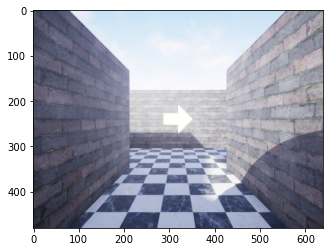

In [3]:
env = UE4EnvWrapper()

if env.isconnected():
    fig, ax = plt.subplots()
    ax.imshow(env.request_image())

In [4]:
env = UE4EnvWrapper()
env.isconnected()

Is Listening
Client Connected
9000
Configuration
Config file: C:/Users/Oliver Chang/Documents/Unreal Projects/Arcs/WindowsNoEditor/Arcs/Binaries/Win64/unrealcv.ini
Port: 9000
Width: 640
Height: 480
FOV: 90.000000
EnableInput: true
EnableRightEye: false



True

### Animation Code

In [5]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time

# Animation function.TODO: make it output an embedded HTML figure 
def animate(image_frames, name):    
    """
    Generate a GIF animation of the saved frames
    
    Keyword arguments:
    image_frames -- array of frames    
    name -- name of model
    """
    name = str(name).split('/')[-1]
    fig, ax = plt.subplots()
    ln = plt.imshow(image_frames[0])
    def init():
        ln.set_data(image_frames[0])
        return [ln]

    def update(frame):
    #     print(frame)
        ln.set_array(frame)
        return [ln]

    ani = FuncAnimation(fig, update, image_frames, init_func=init, interval=100)
    # plt.show()
    ani.save(name + "_" + datetime.now().strftime("%d-%m-%Y_%H-%M") + ".mp4")

In [6]:
env.reset()
frames = []
for _ in range(50):
    img = env.request_image()
    # Remove alpha channel
    img = img[:,:,:3]
    action = model_inf.predict(img)
    print(action)

    if action[0] == 'straight':
        env.forward()
    elif action[0] == 'left':
        env.left()
    elif action[0] == 'right':
        env.right()
    else:
        print("ERROR:", action)
    frames.append(img)
    sleep(1)

('straight', tensor(2), tensor([9.0745e-04, 5.2282e-03, 9.9386e-01]))


('straight', tensor(2), tensor([5.4526e-04, 1.2484e-03, 9.9821e-01]))


('straight', tensor(2), tensor([1.6455e-03, 9.2999e-04, 9.9742e-01]))


('straight', tensor(2), tensor([0.0010, 0.0020, 0.9970]))


('straight', tensor(2), tensor([0.0022, 0.0449, 0.9529]))


('straight', tensor(2), tensor([6.0253e-04, 1.1413e-01, 8.8527e-01]))


('right', tensor(1), tensor([0.0038, 0.7115, 0.2847]))


('right', tensor(1), tensor([0.0021, 0.7923, 0.2056]))


('right', tensor(1), tensor([0.0126, 0.8581, 0.1293]))


('right', tensor(1), tensor([0.0123, 0.9100, 0.0776]))


('right', tensor(1), tensor([0.0069, 0.9355, 0.0576]))


('right', tensor(1), tensor([0.0067, 0.7340, 0.2593]))


('right', tensor(1), tensor([0.0181, 0.7547, 0.2271]))


('straight', tensor(2), tensor([0.0213, 0.4240, 0.5547]))


('straight', tensor(2), tensor([0.0157, 0.2192, 0.7651]))


('straight', tensor(2), tensor([0.0169, 0.1153, 0.8679]))


('straight', tensor(2), tensor([0.0284, 0.0480, 0.9235]))


('straight', tensor(2), tensor([0.0449, 0.0427, 0.9123]))


('straight', tensor(2), tensor([0.0197, 0.0669, 0.9134]))


('straight', tensor(2), tensor([0.0144, 0.0219, 0.9637]))


('straight', tensor(2), tensor([0.0152, 0.0599, 0.9249]))


('straight', tensor(2), tensor([0.0044, 0.0487, 0.9468]))


('straight', tensor(2), tensor([0.0382, 0.0336, 0.9281]))


('straight', tensor(2), tensor([0.0283, 0.0400, 0.9318]))


('straight', tensor(2), tensor([0.0211, 0.0919, 0.8869]))


('straight', tensor(2), tensor([0.0087, 0.0311, 0.9602]))


('straight', tensor(2), tensor([0.0175, 0.0902, 0.8923]))


('straight', tensor(2), tensor([0.0035, 0.1038, 0.8927]))


('straight', tensor(2), tensor([0.0389, 0.0316, 0.9295]))


('straight', tensor(2), tensor([0.0107, 0.0488, 0.9405]))


('straight', tensor(2), tensor([0.0225, 0.0459, 0.9316]))


('straight', tensor(2), tensor([0.0071, 0.0365, 0.9563]))


('straight', tensor(2), tensor([0.0223, 0.0240, 0.9537]))


('straight', tensor(2), tensor([0.0116, 0.0509, 0.9374]))


('straight', tensor(2), tensor([0.0105, 0.0314, 0.9581]))


('straight', tensor(2), tensor([0.0169, 0.0335, 0.9497]))


('straight', tensor(2), tensor([0.0159, 0.0342, 0.9499]))


('straight', tensor(2), tensor([0.0075, 0.1162, 0.8763]))


('straight', tensor(2), tensor([0.0139, 0.0166, 0.9695]))


('straight', tensor(2), tensor([0.0167, 0.0839, 0.8994]))


('straight', tensor(2), tensor([0.0045, 0.0715, 0.9240]))


('straight', tensor(2), tensor([0.0358, 0.0264, 0.9377]))


('straight', tensor(2), tensor([0.0171, 0.0735, 0.9094]))


('straight', tensor(2), tensor([0.0116, 0.0684, 0.9200]))


('straight', tensor(2), tensor([0.0113, 0.0396, 0.9491]))


('straight', tensor(2), tensor([0.0072, 0.0580, 0.9347]))


('straight', tensor(2), tensor([0.0163, 0.0580, 0.9257]))


('straight', tensor(2), tensor([0.0416, 0.0197, 0.9387]))


('straight', tensor(2), tensor([0.0099, 0.0299, 0.9602]))


('straight', tensor(2), tensor([0.0421, 0.0236, 0.9343]))


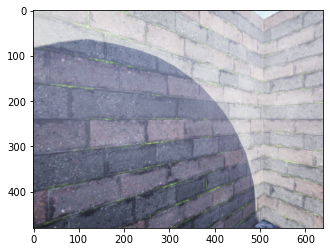

In [7]:
animate(frames, "auto-gen-c")

In [6]:
img.shape

(480, 640, 3)

In [7]:
type(img)

numpy.ndarray

In [8]:
img = img[:,:,:3]

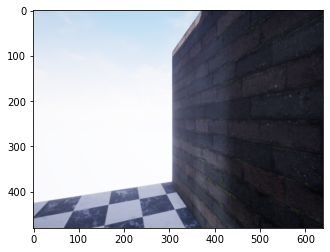

In [9]:
plt.imshow(img)